<a href="https://colab.research.google.com/github/JoaoPariss/MODULO-39---XGBOOST/blob/main/MOD39_EXERCICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [30]:
# Importação das Bibliotecas
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [31]:
# Carregamento da Base
df = pd.read_csv('CARRO_CLIENTES.csv')
df.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [32]:
# Verificação de Tipos de Dados
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
AnnualSalary,int64
Purchased,int64


Variável Gender deverá ser codificada.

Variável User ID deverá ser removida.

Demais variáveis estão com tipo correto para modelagem.

In [33]:
# Verificação de Dados Nulos
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


Não há valores nulos.

In [34]:
# Exclusão User ID
df.drop('User ID', axis=1, inplace=True)

# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [35]:
# Codificação Coluna Gender
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

In [36]:
df

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

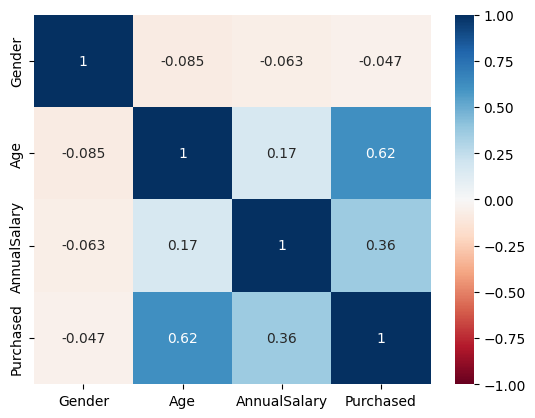

In [37]:
# Matriz de Correlação com Seaborn
sns.heatmap(df.corr(), annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1)
plt.show()

Observa-se que a variável mais correlacionada à coluna target, Purchased, é a idade, Age. Correlação = 0,62.

A coluna AnnualSalary também apresenta uma correlação positiva com Purchased, 0,36.

Já a coluna de gênero apresenta uma pequena correlação negativa (-0,047) com a variável target, e com as demais variáveis da base.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [38]:
# Separação da Base em X e Y
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [39]:
# Separação da Base em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [46]:
# Modelagem - Utilizando os Hyperparâmetros: max_depth, n_estimators e learning_rate
model_xgboost = xgb.XGBClassifier(max_depth=4, n_estimators=100, learning_rate=0.1)

In [52]:
# Consulta da Função Objetivo do Modelo
model_xgboost.objective

'binary:logistic'

In [47]:
# Treinamento do Modelo
model_xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [48]:
# Previsão
y_pred = model_xgboost.predict(x_test)
y_pred_proba = model_xgboost.predict_proba(x_test)

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [49]:
# Verificação das Probabilidades Previstas
y_pred_proba

array([[8.09226453e-01, 1.90773547e-01],
       [4.61053252e-02, 9.53894675e-01],
       [9.99308586e-01, 6.91436755e-04],
       [8.48408997e-01, 1.51591003e-01],
       [2.70200610e-01, 7.29799390e-01],
       [4.75720763e-02, 9.52427924e-01],
       [4.51427698e-03, 9.95485723e-01],
       [9.98756588e-01, 1.24342833e-03],
       [9.89644289e-01, 1.03557026e-02],
       [9.91422713e-01, 8.57727043e-03],
       [9.39046621e-01, 6.09533712e-02],
       [9.99185860e-01, 8.14119587e-04],
       [8.97307932e-01, 1.02692060e-01],
       [9.98063684e-01, 1.93632417e-03],
       [2.53973007e-02, 9.74602699e-01],
       [1.21717095e-01, 8.78282905e-01],
       [4.96334374e-01, 5.03665626e-01],
       [1.33384466e-01, 8.66615534e-01],
       [1.29297495e-01, 8.70702505e-01],
       [9.99030530e-01, 9.69445799e-04],
       [9.96734142e-01, 3.26588121e-03],
       [1.59945488e-02, 9.84005451e-01],
       [4.23161983e-02, 9.57683802e-01],
       [9.99297857e-01, 7.02154008e-04],
       [3.313887

In [53]:
# Verificação das Classes Previstas
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

In [55]:
# Avaliação
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", confusion)

Acurácia: 0.905
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       112
           1       0.92      0.86      0.89        88

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200

Matriz de Confusão:
 [[105   7]
 [ 12  76]]


O modelo alcançou 90,5% de acurácia, mostrando um bom desempenho geral. Ele identifica bem a classe 0, com 94% de recall, e a classe 1 com 86%. A precisão está equilibrada, com 90% para a classe 0 e 92% para a classe 1. A matriz de confusão mostra poucos erros, mas o modelo erra mais ao classificar a classe 1 como 0 do que o contrário. No geral, o resultado é consistente e confiável para as duas classes.

# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

In [56]:
# Extração da Importância das Variáveis pelo Ganho
importances = model_xgboost.get_booster().get_score(importance_type='gain')

# Convertendo o dicionário de importâncias para um DataFrame
importance_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Importance
1           Age    7.561465
2  AnnualSalary    4.065725
0        Gender    1.125025


A variável Age apresentou a maior correlação com a variável alvo (0,62) e também a maior importância no modelo (7,56), mostrando sua relevância nas previsões. AnnualSalary ficou em segundo lugar na correlação (0,36) e na importância (4,07), confirmando sua influência. Já Gender teve correlação quase nula (-0,047) e baixa importância (1,12), indicando pouca contribuição. Esses resultados mostram que a correlação refletiu bem a importância das features no modelo.